In [10]:
import os, pandas as pd, numpy as np

In [13]:
os.chdir("C:\\Users\\Admin\\Downloads\\Bootcamp Assignement\\A1a")

In [14]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [15]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [17]:
GA = df[df['state_1']=="GOA"]

In [18]:
GA.isnull().sum().sort_values(ascending = False)

soyabean_q          447
Meals_School        447
soyabean_v          447
Meals_Others        445
Days_Stayed_away    442
                   ... 
brinjal_q             0
tamato_q              0
onion_q               0
potato_q              0
fv_tot                0
Length: 384, dtype: int64

In [19]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [20]:
GA_new = GA[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','fishprawn_q','Meals_At_Home']]

In [21]:
GA_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       2
state_1             0
District            0
Sector              0
Region              0
State_Region        0
ricetotal_q         0
wheattotal_q        0
moong_q             0
Milktotal_q         0
chicken_q           0
bread_q             0
foodtotal_q         0
Beveragestotal_v    0
fishprawn_q         0
dtype: int64

In [22]:
GA_clean =GA_new.copy()

In [23]:
GA_clean.loc[:, 'Meals_At_Home'] = GA_clean['Meals_At_Home'].fillna(GA_new['Meals_At_Home'].mean())

In [24]:
GA_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
fishprawn_q         False
Meals_At_Home       False
dtype: bool

In [19]:
# Outlier Checking

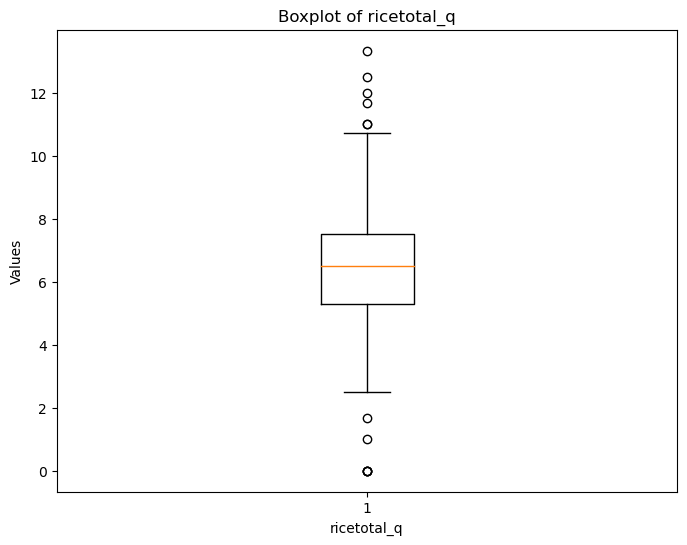

In [26]:
import matplotlib.pyplot as plt
# Assuming GA_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(GA_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

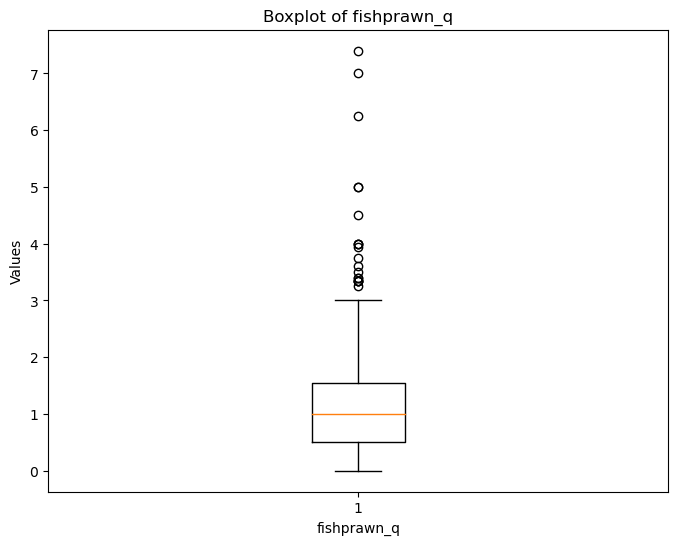

In [27]:
import matplotlib.pyplot as plt
# Assuming GA_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(GA_clean['fishprawn_q'])
plt.xlabel('fishprawn_q')
plt.ylabel('Values')
plt.title('Boxplot of fishprawn_q')
plt.show()

In [29]:
rice1 = GA_clean['ricetotal_q'].quantile(0.25)
rice2 = GA_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [30]:
GA_clean=GA_new[(GA_new['ricetotal_q']<=up_limit)&(GA_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a48e55a250>,
 'caps': [<matplotlib.lines.Line2D at 0x2a48e55b3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a48e559890>],
 'medians': [<matplotlib.lines.Line2D at 0x2a48e5686d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a48e569010>],
 'means': []}

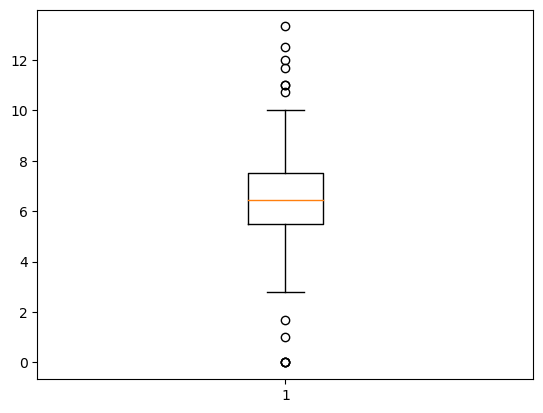

In [33]:
plt.boxplot(GA_clean['ricetotal_q'])

In [34]:
FP1 = GA_clean['fishprawn_q'].quantile(0.25)
FP2 = GA_clean['fishprawn_q'].quantile(0.75)
iqr_FP = FP2-FP1
up_limit = FP2 + 1.5*iqr_FP
low_limit = FP1 - 1.5*iqr_FP

In [35]:
GA_clean=GA_new[(GA_new['fishprawn_q']<=up_limit)&(GA_new['fishprawn_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2a48e5ddb90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a48e534ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a48e5dced0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a48da7fd10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a48da7ccd0>],
 'means': []}

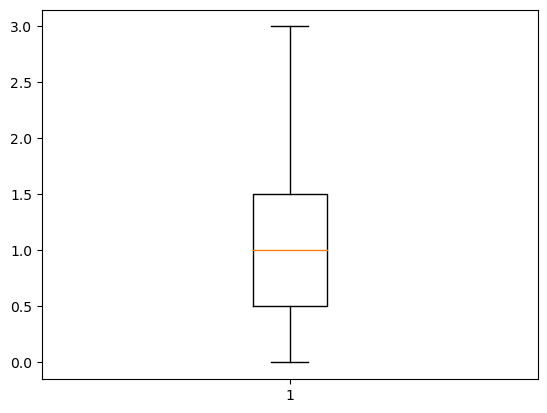

In [36]:
plt.boxplot(GA_clean['fishprawn_q'])

In [39]:
GA_clean['District'].unique()

array([2, 1], dtype=int64)

In [40]:
# Replace values in the 'Sector' column
GA_clean.loc[:,'Sector'] = GA_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [41]:
#total consumption

In [42]:
GA_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'fishprawn_q',
       'Meals_At_Home'],
      dtype='object')

In [43]:
GA_clean.loc[:, 'total_consumption'] = GA_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'fishprawn_q','foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3344\446438552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GA_clean.loc[:, 'total_consumption'] = GA_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'fishprawn_q','foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [44]:
GA_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,fishprawn_q,Meals_At_Home,total_consumption
22949,GOA,2,RURAL,1,301,7.500000,0.75,0.000000,0,1.0,0.25,26.850600,85.014500,0.750000,58.0,122.115100
22950,GOA,2,RURAL,1,301,7.500000,1.00,0.000000,0,1.0,0.50,35.625493,40.002500,1.500000,60.0,87.127993
22951,GOA,2,RURAL,1,301,7.500000,2.50,0.125000,0,0.0,0.00,22.575320,20.005000,0.750000,60.0,53.455320
22952,GOA,2,RURAL,1,301,8.333333,0.00,0.166667,0,0.0,0.00,25.967018,16.673333,0.333333,60.0,51.473685
22953,GOA,2,RURAL,1,301,5.000000,1.75,0.000000,0,0.0,0.00,22.420334,27.505000,0.500000,60.0,57.175334


In [45]:
GA_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              28.270477  56.614249  251.578147  0.0

In [46]:
GA_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                
                       std       mean         max      min
District                                                  
1                31.488070  55.669657  251.578147  0.00000
2                24.657626  57.563277  173.194678  8.00026

In [47]:
total_consumption_by_districtcode=GA_clean.groupby('District')['total_consumption'].sum()

In [49]:
total_consumption_by_districtcode.sort_values(ascending=False).head(2)

District
2    12260.978020
1    11913.306511
Name: total_consumption, dtype: float64

In [50]:
GA_clean.loc[:,"District"] = GA_clean.loc[:,"District"].replace({1: "North Goa", 2: "South Goa"})

In [51]:
total_consumption_by_districtname=GA_clean.groupby('District')['total_consumption'].sum()

In [52]:
total_consumption_by_districtname.sort_values(ascending=False).head(2)

District
South Goa    12260.978020
North Goa    11913.306511
Name: total_consumption, dtype: float64

In [53]:
from statsmodels.stats import weightstats as stests

In [54]:
rural=GA_clean[GA_clean['Sector']=="RURAL"]
urban=GA_clean[GA_clean['Sector']=="URBAN"]

In [55]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,fishprawn_q,Meals_At_Home,total_consumption
22949,GOA,South Goa,RURAL,1,301,7.500000,0.75,0.000000,0,1.0,0.25,26.850600,85.014500,0.750000,58.0,122.115100
22950,GOA,South Goa,RURAL,1,301,7.500000,1.00,0.000000,0,1.0,0.50,35.625493,40.002500,1.500000,60.0,87.127993
22951,GOA,South Goa,RURAL,1,301,7.500000,2.50,0.125000,0,0.0,0.00,22.575320,20.005000,0.750000,60.0,53.455320
22952,GOA,South Goa,RURAL,1,301,8.333333,0.00,0.166667,0,0.0,0.00,25.967018,16.673333,0.333333,60.0,51.473685
22953,GOA,South Goa,RURAL,1,301,5.000000,1.75,0.000000,0,0.0,0.00,22.420334,27.505000,0.500000,60.0,57.175334


In [56]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,fishprawn_q,Meals_At_Home,total_consumption
63731,GOA,South Goa,URBAN,1,301,6.25,0.750000,0.250,0,0.500000,0.8,21.075760,37.510000,2.250000,60.0,69.385760
63732,GOA,South Goa,URBAN,1,301,7.50,1.000000,0.125,0,0.250000,0.4,19.150775,37.508750,1.250000,60.0,67.184525
63733,GOA,South Goa,URBAN,1,301,9.00,1.200000,0.050,0,0.400000,0.0,18.410278,12.004800,0.720000,60.0,41.785078
63734,GOA,South Goa,URBAN,1,301,9.00,2.400000,0.500,0,0.000000,0.0,24.410256,18.000000,0.000000,60.0,54.310256
63735,GOA,South Goa,URBAN,1,301,10.00,1.666667,0.100,0,0.333333,0.0,24.240443,21.666667,0.953333,60.0,58.960443


In [57]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [58]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 0.621364985086109
P-Value: 0.5343595049803629
